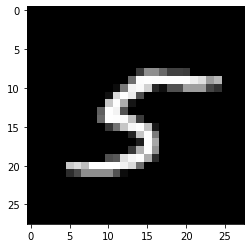

In [2]:
#Importér datasæt
import csv
from random import randint
import numpy as np
from matplotlib import pyplot as plt

file = open("MNIST-5-6-Subset.txt") #Open file
csvreader = csv.reader(file, delimiter = ' ') #pass to csvreader
data = next(csvreader) #read in data - notice harddeletede trailing whitespace
data = np.reshape(data, (1877,784)).astype('f') #reshape data and ?transpose

file = open("MNIST-5-6-Subset-Labels.txt") #Open file
csvreader = csv.reader(file, delimiter = ' ') #pass to csvreader
labels = next(csvreader)
labels = labels[:-1] #remove whitespace

labelstrans = np.array([-1 if label == "5" else 1 for label in labels]) #transform labels 
#Plotting for sanity check
x = np.reshape(data[76], (28,28)).T

plt.imshow(x, cmap='gray', interpolation='nearest', vmin=0, vmax=1)
plt.show()

S_train = data[0:100] #Make trainingdataset




In [5]:
def make_validationrange(i, n):
    return(range(100+i*n,100+(i+1)*n)) #convinience function for making validationset

def eucliddistance(x,y): #calculates euclidean distance
    return((x-y)@(x-y).T)

#dists = eucliddistance(S_train,np.tile(S_train[0],(100,1))) #Np tile replicates a numpy array in a (shape) 

def dist_to_trainset(train_set, x):
    matrixreplica = np.tile(x, (100,1)) # Make a matrix repeating x in correct (shape)
    distances = eucliddistance(train_set, matrixreplica) # calculate distances 
    return(np.diag(distances)) #distances can be found by extracting the diagonalelements

def dist_sorted(distances, labels):
    labeled = np.append([distances], [labels], axis=0) #Include labels 
    sorted = labeled[:,labeled[0,:].argsort()] #Sort data by first row where the distances are
    prediction = np.cumsum(sorted[1,:],0) #calculate running sum over the sorted labels
    return(prediction)

#Function for assigning running sum to label
def assign(x):
    if(x>0):
        return(1)
    else:
        return(-1)
assign = np.vectorize(assign) #vectorize function to make it faster over arrays

#Implementation of KNN-alorightm train_set denotes training set, x denotes new input, labels denotes the transformed labels
def KNN(train_set, x, labels):
    dist = dist_to_trainset(train_set, x) #calculate distance of newpoint to dataset 
    sorted = dist_sorted(dist, labels) #Sort wrt. distance
    prediction = assign(sorted) #Label points as either -1 or 1 corresponding to 5 and 6
    return(prediction)

##validate takes argument index, which refers to the index'th number in the datafile
def validate(prediction, index, label):
    rep = np.tile(label[index],100) #replic
    return((prediction != rep).astype('f')) #return the 0-1 loss

#range should be a range() object
def validation_error(train_set, data, labels, range):
    sum_of_loss = np.zeros(100) #make a zero vector to add loss to
    for i in range:
        prediction = KNN(S_train, data[i], labels[0:100]) #Make prediction
        loss = validate(prediction, i, labels) #Evaluate loss
        sum_of_loss = sum_of_loss +  loss #update sum of loss
    return(sum_of_loss/len(range))


[110, 111, 112, 113, 114, 115, 116, 117, 118, 119]

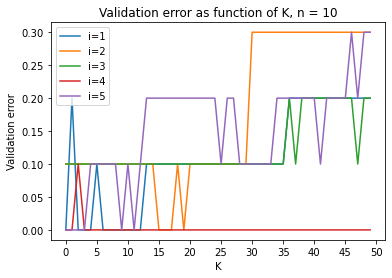

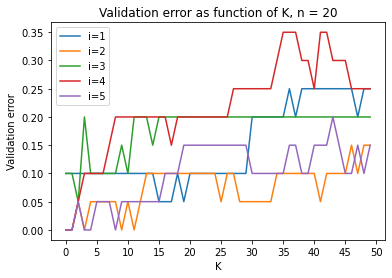

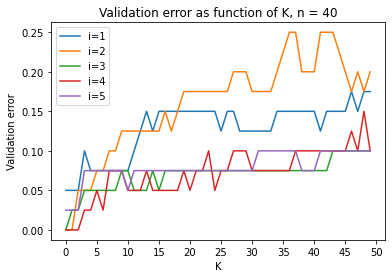

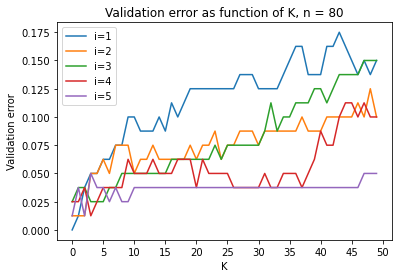

In [4]:
##Plotting validation error as function of K 
ns = [10,20,40,80]
for n in ns: # loop over n's
    for i in range(1,6): #loop over i's
        forplot = validation_error(S_train, data, labelstrans, make_validationrange(i,n))[0:50] #calculate data for plot
        plt.plot(forplot, label= "i=" + str(i)) #create the actual plot
   
    plt.legend()
    plt.title("Validation error as function of K, n = " + str(n))
    plt.xlabel("K")
    plt.xticks(np.arange(0,55,5))
    plt.ylabel("Validation error")
    plt.savefig("Valdidation error_n" + str(n), facecolor='w', )
    plt.show()
    plt.close()

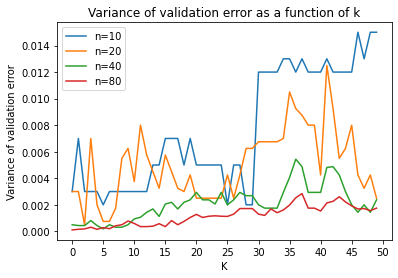

In [5]:
#Plotting variance of validation error as a function of K
ns = [10,20,40,80]
for n in ns: # loop over n's
    for i in range(1,6): #loop over i's
        if i == 1: # if i = 1 create array 
            forplot = validation_error(S_train, data, labelstrans, make_validationrange(i,n))[0:50]
        else: #else append to existing array
            forplot = np.append(forplot,validation_error(S_train, data, labelstrans, make_validationrange(i,n))[0:50]) 

    reshaped = np.reshape(forplot,(50,5),'F') #reshape such that each row corresponds to fixed K and columns vary with i 'F' ensures data a read in col by col
    repmeans = np.broadcast_to(np.mean(reshaped, axis = 1),(5,50)).T #Replicate mean of each row and make sure dimension fits
    var = np.var(reshaped,1,ddof = 1)
    plt.plot(var, label= "n=" + str(n))
plt.legend()
plt.xticks(np.arange(0,55,5))
plt.title("Variance of validation error as a function of k")
plt.xlabel("K")
plt.ylabel("Variance of validation error")
plt.savefig("Valdidation error varriance", facecolor='w')



In [6]:
#Task 2
file = open("MNIST-5-6-Subset-Light-Corruption.txt") #Open file
csvreader = csv.reader(file, delimiter = ' ') #pass to csvreader
data_light = next(csvreader) #read in data - notice harddeletede trailing whitespace
data_light = np.reshape(data_light, (1877,784)).astype('f') #reshape data and 

file = open("MNIST-5-6-Subset-Moderate-Corruption.txt") #Open file
csvreader = csv.reader(file, delimiter = ' ') #pass to csvreader
data_mod = next(csvreader) #read in data - notice harddeletede trailing whitespace
data_mod = np.reshape(data_mod, (1877,784)).astype('f') #reshape data

file = open("MNIST-5-6-Subset-Heavy-Corruption.txt") #Open file
csvreader = csv.reader(file, delimiter = ' ') #pass to csvreader
data_heavy = next(csvreader) #read in data - notice harddeletede trailing whitespace
data_heavy = np.reshape(data_heavy, (1877,784)).astype('f') #reshape data


S_train_light = data_light[0:100] #Make trainingdataset
S_train_mod = data_mod[0:100] #Make trainingdataset
S_train_heavy = data_heavy[0:100] #Make trainingdataset


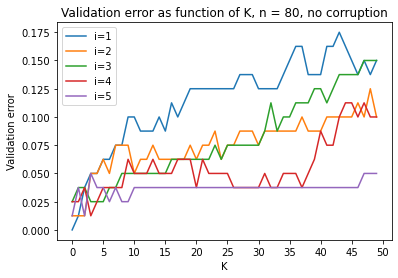

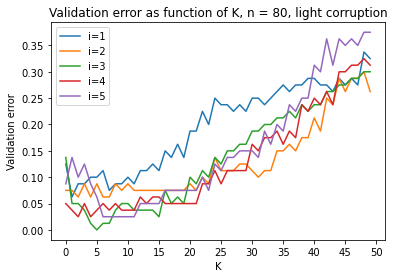

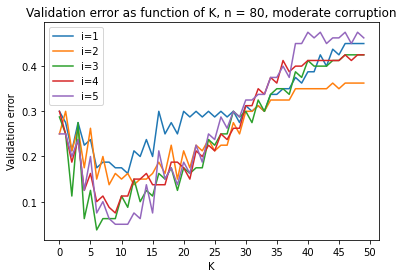

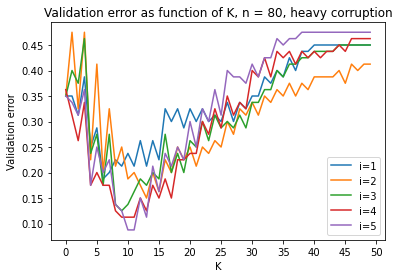

array([[0.395076 , 0.943623 , 0.412158 , ..., 0.137507 , 0.0937112,
        0.497648 ],
       [0.126426 , 0.919409 , 0.792308 , ..., 0.105153 , 0.466582 ,
        0.137852 ],
       [0.452915 , 0.707771 , 0.493391 , ..., 0.237892 , 0.198202 ,
        0.269758 ],
       ...,
       [0.0846856, 0.335119 , 0.0322712, ..., 0.530054 , 0.904383 ,
        0.895039 ],
       [0.329091 , 0.768762 , 0.0330584, ..., 0.873162 , 0.218642 ,
        0.236913 ],
       [0.365854 , 0.0737657, 0.0196049, ..., 0.507703 , 0.13529  ,
        0.848243 ]], dtype=float32)

In [7]:
##Plotting validation error as function of K 
n=80

def corruptionplot(trainset, dataset, labels, corruption):
    for i in range(1,6): #loop over i's
        forplot = validation_error(trainset, dataset, labels, make_validationrange(i,n))[0:50] #calculate data for plot
        plt.plot(forplot, label= "i=" + str(i)) #create the actual plot
    
    plt.legend()
    plt.title("Validation error as function of K, n = " + str(n) +   ", " + corruption+ " corruption" )
    plt.xlabel("K")
    plt.ylabel("Validation error")
    plt.xticks(np.arange(0,55,5))
    plt.savefig("Valdidation error corruption" + corruption, facecolor='w', )
    plt.show()
    plt.close()
sets = [data, data_light, data_mod, data_heavy]
trainsets = [S_train, S_train_light, S_train_mod, S_train_heavy]
corruptions = ["no", "light", "moderate", "heavy"]


for j in range(4):
    corruptionplot(trainsets[j], sets[j], labelstrans, corruptions[j])
